<a href="https://colab.research.google.com/github/PavelNovikov888/Anomaly_Detection/blob/master/%D0%94%D0%B5%D1%82%D0%B5%D0%BA%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B0%D0%BD%D0%BE%D0%BC%D0%B0%D0%BB%D0%B8%D0%B9_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A2%D1%8C%D1%8E%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Статистические и вероятностные методы обнаружения аномалий

In [ ]:
# Импортируем необходимые библиотеки
import warnings

warnings.filterwarnings('ignore')
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.covariance import EllipticEnvelope
# from sklearn.datasets import load_boston

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
data.shape

(506, 13)

In [ ]:
target.shape

(506,)

In [ ]:
data[:, 8][:20]

array([1., 2., 2., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5., 4., 4., 4., 4.,
       4., 4., 4.])

Потренируемся на бостонском датасете. Данные о ценах на дома в Бостоне, сам датасет включает в себя следующие колонки:

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per \$10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of people by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in \$1000s   


 КРИМ: Уровень преступности на душу населения по городам.
- ZN: Доля жилой земли, зонированной для участков площадью более 25 000 кв. футов.
- ПРОМЫШЛЕННОСТЬ: доля площадей под неторговую деятельность на город.
- CHAS: фиктивная переменная реки Чарльз (= 1, если тракт ограничивает реку; 0 в противном случае)
- NOX: концентрация оксида азота (частей на 10 миллионов).
- RM: Среднее количество комнат в жилище.
- ВОЗРАСТ: доля квартир, занимаемых владельцами, построенных до 1940 года.
- DIS: взвешенные расстояния до пяти центров занятости Бостона.
- RAD: Индекс доступности радиальных автомагистралей.
- НАЛОГ: ставка налога на имущество на полную стоимость за 10 000 \$.
- PTRATIO: соотношение учеников и учителей по городам.
- B: 1000(Bk — 0,63)², где Bk — доля населения по городам.
- LSTAT: Процент населения с более низким статусом.
- MEDV: средняя стоимость домов, занимаемых владельцами, в 1000 долларов США.

In [ ]:
# Загрузим данные, возьмем 2 группы признаков: RAD и PTRATION
X1 = data[:, [8, 10]]

# RM и LSTAT
X2 = data[:, [5, 12]]

In [ ]:
# Загрузим данные, возьмем 2 группы признаков: RAD и PTRATION
# X1 = raw_df()['data'][:, [8, 10]]
# X1 = raw_df.iloc[:, [8]]

# RM и LSTAT
# X2 = raw_df()['data'][:, [5, 12]]
# X2 = raw_df.iloc[:, [5]]

In [ ]:
X1

array([[ 1. , 15.3],
       [ 2. , 17.8],
       [ 2. , 17.8],
       ...,
       [ 1. , 21. ],
       [ 1. , 21. ],
       [ 1. , 21. ]])

## Поиск аномалий с помощью BoxPlot и IQR

<Axes: >

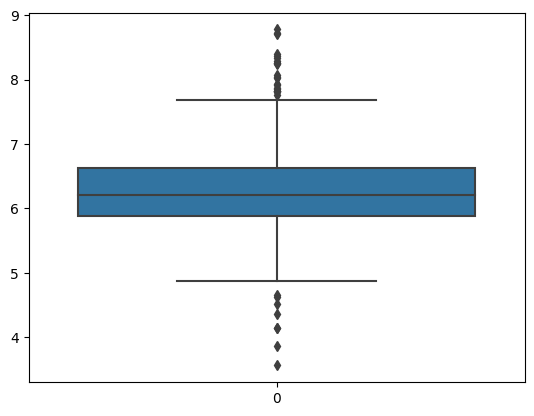

In [ ]:
# Построим BoxPlot по признакам из X2 и посмотрим, есть ли выбросы
sns.boxplot(X2[:, 0])

Мы видим, что дома с >8 квартирами могут быть восприняты как выбросы

<Axes: >

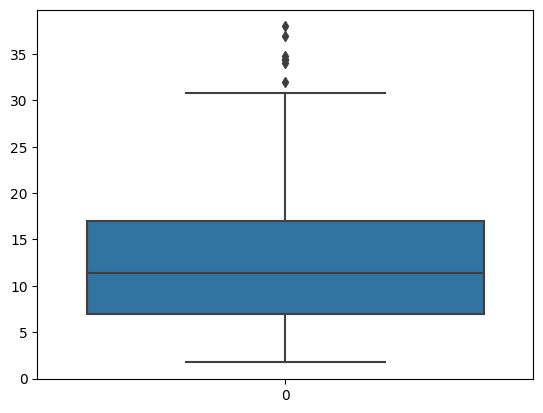

In [ ]:
sns.boxplot(X2[:, 1])

Видим, что районы, в которых бедного населения > 30% тоже можно рассматривать как выбросы

In [ ]:
# Чтобы посчитать IQR отдельно от графика можно воспользоваться либо numpy, либо scipy
iqr = np.percentile(X2[:, 1], 75) - np.percentile(X2[:, 1], 25)
print(iqr)

import scipy
iqr = scipy.stats.iqr(X2[:, 1])
print(iqr)

10.005000000000003
10.005000000000003


# Оценка распределения и дисперсии распределения для поиска аномалий

Давайте оценим дисперсии выборок в предположении о нормальном распределении

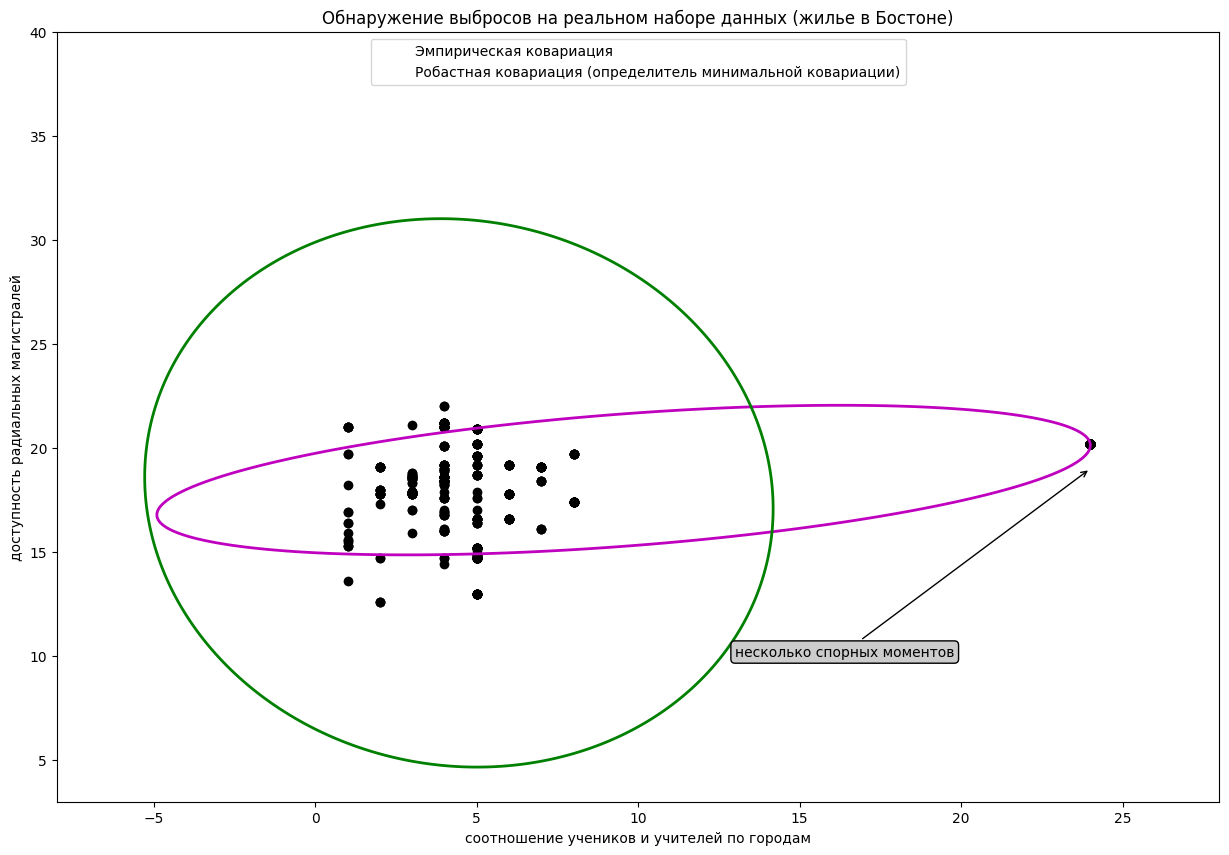

In [ ]:
# Алгоритмы оценки ковариационной матрицы
classifiers = {
    "Эмпирическая ковариация": EllipticEnvelope(support_fraction=1.,
                                             contamination=0.261),
    "Робастная ковариация (определитель минимальной ковариации)":
    EllipticEnvelope(contamination=0.261)}

colors = ['m', 'g', 'b']

figure(figsize=(15, 10))
legend1 = {}
legend2 = {}

# Код для визуализации
xx1, yy1 = np.meshgrid(np.linspace(-8, 28, 500), np.linspace(3, 40, 500))
xx2, yy2 = np.meshgrid(np.linspace(3, 10, 500), np.linspace(-5, 45, 500))
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X1)
    Z1 = clf.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
    Z1 = Z1.reshape(xx1.shape)
    legend1[clf_name] = plt.contour(
        xx1, yy1, Z1, levels=[0], linewidths=2, colors=colors[i])

legend1_values_list = list( legend1.values() )
legend1_keys_list = list( legend1.keys() )

plt.title("Обнаружение выбросов на реальном наборе данных (жилье в Бостоне)")
plt.scatter(X1[:, 0], X1[:, 1], color='black')
bbox_args = dict(boxstyle="round", fc="0.8")
arrow_args = dict(arrowstyle="->")
plt.annotate("несколько спорных моментов", xy=(24, 19),
             xycoords="data", textcoords="data",
             xytext=(13, 10), bbox=bbox_args, arrowprops=arrow_args)
plt.xlim((xx1.min(), xx1.max()))
plt.ylim((yy1.min(), yy1.max()))
plt.legend((legend1_values_list[0].collections[0],
            legend1_values_list[1].collections[0]),
           (legend1_keys_list[0], legend1_keys_list[1]),
           loc="upper center")
plt.ylabel("доступность радиальных магистралей")
plt.xlabel("соотношение учеников и учителей по городам");

Задание:
Сколько точек предполагаются аномальными при оценке accessibility to radial highways статистическим способом?

In [ ]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

data = pd.DataFrame(data)
outliers, cleaned = outliers_iqr(data, 10)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 15
Результирующее число записей: 491


In [ ]:
# количество точек
outliers[10].value_counts().shape[0]

2